## Observations and Insights 

In [406]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head(5)
mouse_metadata = mouse_metadata.sort_values(by=["Mouse ID"])
study_results.head(5)
study_results = study_results.sort_values(by=["Mouse ID"])

# Combine the data into a single dataset
result = pd.merge(study_results,mouse_metadata)
# Display the data table for preview
result.head(15)

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,25,56.793208,1,Infubinol,Female,20,23
3,a203,40,63.593490,2,Infubinol,Female,20,23
4,a203,35,61.931650,2,Infubinol,Female,20,23
5,a203,10,51.852437,1,Infubinol,Female,20,23
6,a203,20,55.173336,1,Infubinol,Female,20,23
7,a203,15,52.777870,1,Infubinol,Female,20,23
8,a203,45,67.973419,2,Infubinol,Female,20,23
9,a203,30,59.523197,1,Infubinol,Female,20,23


In [407]:
# Checking the number of mice.
len(result["Mouse ID"].drop_duplicates())

249

In [538]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

result = result.dropna()
result_tem = result.get(['Mouse ID', 'Timepoint'])
bool_series = result_tem.duplicated()
# duplicate_mice_df = []
for x in range(len(result_tem)):
    if bool_series[x] == True:
        print(result_tem.iloc[x])
        

Mouse ID     g989
Timepoint       0
Name: 589, dtype: object
Mouse ID     g989
Timepoint      10
Name: 591, dtype: object
Mouse ID     g989
Timepoint      15
Name: 592, dtype: object
Mouse ID     g989
Timepoint      20
Name: 595, dtype: object
Mouse ID     g989
Timepoint       5
Name: 597, dtype: object


In [409]:
Duplicate_mice = []

In [410]:
# Optional: Get all the data for the duplicate mouse ID. 
for x in range(len(result_tem)):
    if bool_series[x] == True:
        result.iloc[x]

Mouse ID                   g989
Timepoint                     0
Tumour Volume (mm3)          45
Metastatic Sites              0
Drug Regimen           Propriva
Sex                      Female
Age_months                   21
Weight (g)                   26
Name: 589, dtype: object
Mouse ID                   g989
Timepoint                    10
Tumour Volume (mm3)     49.8805
Metastatic Sites              0
Drug Regimen           Propriva
Sex                      Female
Age_months                   21
Weight (g)                   26
Name: 591, dtype: object
Mouse ID                   g989
Timepoint                    15
Tumour Volume (mm3)      53.442
Metastatic Sites              0
Drug Regimen           Propriva
Sex                      Female
Age_months                   21
Weight (g)                   26
Name: 592, dtype: object
Mouse ID                   g989
Timepoint                    20
Tumour Volume (mm3)     54.6577
Metastatic Sites              1
Drug Regimen           Propri

In [411]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = result[~bool_series]
cleaned_df.head(10)
# cleaned_df.to_csv('data/cleaned_df.csv')

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,25,56.793208,1,Infubinol,Female,20,23
3,a203,40,63.593490,2,Infubinol,Female,20,23
4,a203,35,61.931650,2,Infubinol,Female,20,23
5,a203,10,51.852437,1,Infubinol,Female,20,23
6,a203,20,55.173336,1,Infubinol,Female,20,23
7,a203,15,52.777870,1,Infubinol,Female,20,23
8,a203,45,67.973419,2,Infubinol,Female,20,23
9,a203,30,59.523197,1,Infubinol,Female,20,23


In [412]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].drop_duplicates())

249

## Summary Statistics

In [413]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

    # Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumour volume. 

df_mean = cleaned_df.groupby(by=["Drug Regimen"])["Tumour Volume (mm3)"].mean()
df_median = cleaned_df.groupby(by=["Drug Regimen"])["Tumour Volume (mm3)"].median()
df_var = cleaned_df.groupby(by=["Drug Regimen"])["Tumour Volume (mm3)"].var()
df_std = cleaned_df.groupby(by=["Drug Regimen"])["Tumour Volume (mm3)"].std()
df_sem = cleaned_df.groupby(by=["Drug Regimen"])["Tumour Volume (mm3)"].sem()


In [414]:
# Assemble the resulting series into a single summary dataframe.

summary_df = {}
summary_df = pd.DataFrame({
    "mean": df_mean,
    "median": df_median,
    "var": df_var,
    "std": df_std,
    "sem": df_sem
})
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [415]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
# df = cleaned_df.groupby(by=["Drug Regimen"])["Tumour Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])
df = cleaned_df.groupby(by=["Drug Regimen"])["Tumour Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])
df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

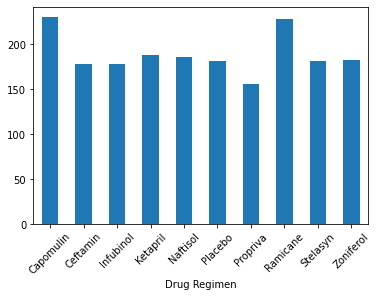

In [416]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# cleaned_df.plot.bar(x=None, y=None, **kwargs)

y_data = cleaned_df.groupby(by=["Drug Regimen"])["Drug Regimen"].count() 
y_data.plot.bar(x="Drug Regimen", y="Total Timepoints",rot=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

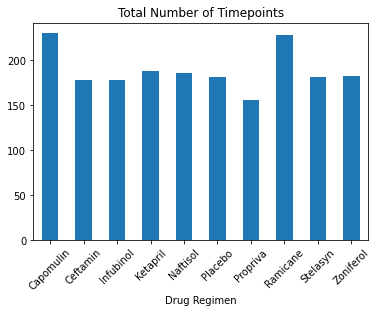

In [417]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_data = cleaned_df.groupby(by=["Drug Regimen"])["Timepoint"].count()   
y_data.plot(kind='bar',title='Total Number of Timepoints')
plt.xticks(rotation=45)


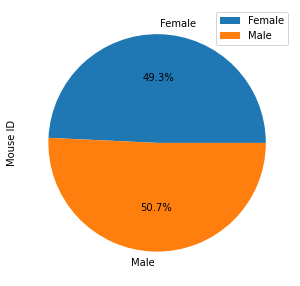

In [418]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = cleaned_df.groupby(by=["Sex"])["Mouse ID"].count()
pie_data
# pie_data_df = pd.DataFrame({'Sex':['Female','Male'], 'Total of Mouse':[930, 958]},index=['Female','Male'])
pie_date_df = pd.DataFrame(pie_data)
pie_date_df.plot.pie(y='Mouse ID', figsize=(5, 5),autopct= '%1.1f%%')

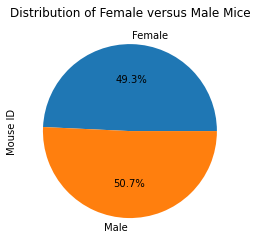

In [419]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_data = cleaned_df.groupby(by=["Sex"])["Mouse ID"].count()
pie_data
pie_data.plot(kind='pie',title='Distribution of Female versus Male Mice', autopct= '%1.1f%%')

## Quartiles, Outliers and Boxplots

In [420]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# A DataFrame that has the last timepoint for each mouse ID is created using groupby
df = cleaned_df.groupby(by=['Mouse ID']).max()
# The index of the DataFrame is reset
df = df.reset_index()
# The DataFrame created to retrieve the maximum timepoint for each mouse
df.head(10)


,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,45.466677,1,Ramicane,Male,3,22
7,a444,45,45.000000,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


Text(0, 0.5, 'Tumour Volume (mm3)')

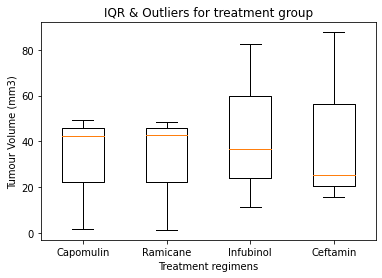

In [421]:
# The four treatment groups, Capomulin, Ramicane, Infubinol, and Ceftamin, are put in a list
Treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumour vol data (for plotting)
tumour_volume_data = []

# Display the interquartile range (IQR) and the outliers for each treatment group by using a Loop 
for x in range(len(Treatment_regimens)):
    tumour_volume = []
    # IQR for each treatment group
    Tumour_Volume_iqr = st.stats.iqr(df.loc[df['Drug Regimen'] == Treatment_regimens[x]]['Tumour Volume (mm3)'])
    # An array for Q1, Q2 & Q3
    Tumour_Volume_Q1 = np.percentile(df.loc[df['Drug Regimen'] == Treatment_regimens[x]]['Tumour Volume (mm3)'], [25,50,75]) 
    Tumour_Volume_LQ = Tumour_Volume_Q1[0] - 1.5 * Tumour_Volume_iqr
    Tumour_Volume_HQ = Tumour_Volume_Q1[2] + 1.5 * Tumour_Volume_iqr
    tumour_volume.append(Tumour_Volume_LQ)
    tumour_volume.append(Tumour_Volume_iqr)
    tumour_volume.append(Tumour_Volume_HQ)
    tumour_volume_data.append(tumour_volume)

# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
plt.boxplot(tumour_volume_data, labels=Treatment_regimens, widths = 0.5, vert=True)
plt.title('IQR & Outliers for treatment group')
plt.xlabel('Treatment regimens')
plt.ylabel('Tumour Volume (mm3)')


## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse ID b128 treated with Capomulin')

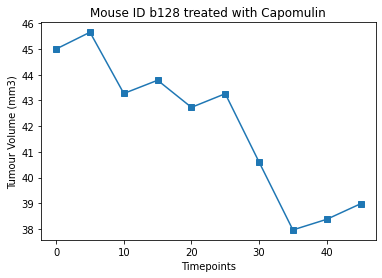

In [536]:
# Select a mouse Mouse ID b128 that was treated with Capomulin, and generate a line plot of tumour volume versus time point for that mouse
Mouse_ID_b128 = cleaned_df.loc[cleaned_df['Mouse ID'] == 'b128']
Mouse_ID_b128 = Mouse_ID_b128.sort_values(by='Timepoint', ascending=True)
x_axis_dot = Mouse_ID_b128['Timepoint']
x_axis_dot
y_axis_dot = Mouse_ID_b128['Tumour Volume (mm3)']
y_axis_dot
plt.plot(x_axis_dot, y_axis_dot,marker='s')
plt.xlabel('Timepoints')
plt.ylabel('Tumour Volume (mm3)')
plt.title('Mouse ID b128 treated with Capomulin')


Text(0.5, 1.0, 'average tumour volume vs. weight for Capomulin regimen')

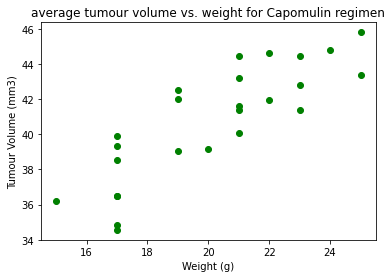

In [535]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
Capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
Capomulin_df_mean = Capomulin_df.groupby(by='Mouse ID').mean()
Capomulin_df_mean
plt.scatter(x=Capomulin_df_mean['Weight (g)'], y=Capomulin_df_mean['Tumour Volume (mm3)'],c='g')
plt.xlabel('Weight (g)')
plt.ylabel('Tumour Volume (mm3)')
plt.title('average tumour volume vs. weight for Capomulin regimen')

## Correlation and Regression

In [522]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumour volume for the Capomulin regimen
x=Capomulin_df_mean['Weight (g)']
pearsonr = st.pearsonr(x=Capomulin_df_mean['Weight (g)'], y=Capomulin_df_mean['Tumour Volume (mm3)'])
print(f'The Pearson correlation coefficient for mouse weight and average tumour volume in the Capomulin regimen is {round(pearsonr[0],2)}')


The Pearson correlation coefficient for mouse weight and average tumour volume in the Capomulin regimen is 0.84


In [526]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumour volume for the Capomulin regimen
slope, intercept, r, p, std_err = st.linregress(x=Capomulin_df_mean['Weight (g)'], y=Capomulin_df_mean['Tumour Volume (mm3)'])

def linearRegression(x):
    return slope * x + intercept

linearRegression_list = list(map(linearRegression,x))


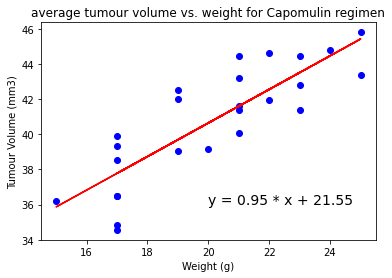

In [534]:
plt.scatter(x=Capomulin_df_mean['Weight (g)'], y=Capomulin_df_mean['Tumour Volume (mm3)'],c='b')
plt.plot(x, linearRegression_list,c='r')
plt.xlabel('Weight (g)')
plt.ylabel('Tumour Volume (mm3)')
plt.title('average tumour volume vs. weight for Capomulin regimen')
plt.annotate(f'y = {round(slope,2)} * x + {round(intercept,2)}',(20,36), fontsize=14)
plt.show()